In [1]:
import seaborn as sns
sns.set_style('white')
flatui = ['#3498db', '#a6901b', '#e8a6ca','#a2b4c5', '#2ecc71', 
          '#d40b51', '#543cee']
sns.set_palette(flatui)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append('/home/jevjev/Dropbox/Projects/Intrinsic-dimensionality/')
from src.utils.train import get_exponential_range
from sklearn.metrics import auc

In [2]:
dims = np.array(list(get_exponential_range()))
print(len(dims))
x = [0, 10000, 20000, 30000, 40000, 50000]
y = [0.4, 0.5, 0.6, 0.7, 0.8]
for i, dim in enumerate(dims):
    print(i, ' ', dim)

15
0   100
1   200
2   300
3   400
4   500
5   1000
6   2000
7   3000
8   4000
9   5000
10   10000
11   20000
12   30000
13   40000
14   50000


In [3]:
cifar = np.array([17.52, 17.96, 21.24, 22.48, 24.05, 28.78,
               34.58, 39.47, 41.86, 45.17, 48.51, 58.26, 
                  61.37, 65.47, 66.4])
print(len(cifar))
breast = np.array([52.12, 52.15, 53.45, 53.22, 51.95, 53.35, 
                  52.5, 53.4, 53.25, 53.05, 53.55, 
                  53.17, 53.35, 52.2, 53])
print(len(breast))
colon = np.array([17.69, 15.47, 16.2, 15.87, 15.65, 17.52, 
                  16.96, 17.25, 19.49, 19.64, 18.54, 
                  21.96, 23.45, 25.6, 27.2])
print(len(colon))
lymphoma = np.array([36.61, 40.79, 43.27, 41.27, 43.23, 47.58, 
                     50.94, 45.8, 50.41, 49.85, 53.07, 54.64, 
                     63.17, 60.51, 62.91])
print(len(lymphoma))
df = pd.DataFrame({'Dimension': dims,
                  'Cifar': cifar,
                  'Breast': breast,
                  'Colon': colon,
                  'Lymphoma': lymphoma}, index=None)
df[['Cifar', 'Breast', 'Colon', 'Lymphoma']] = df[['Cifar', 'Breast', 'Colon', 'Lymphoma']] / 100

15
15
15
15


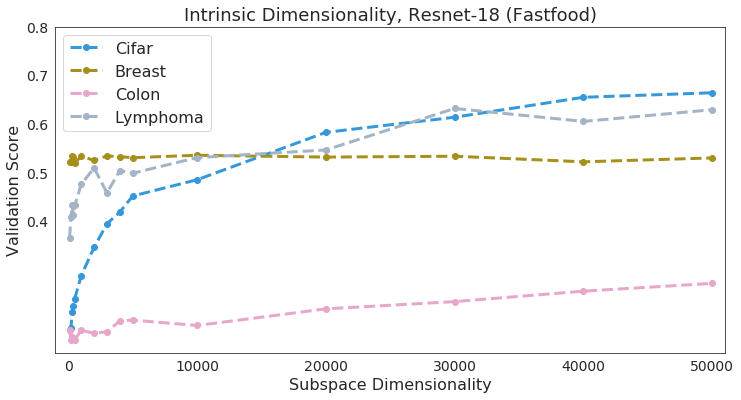

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))
for task in ['Cifar', 'Breast', 'Colon', 'Lymphoma']:
    acc = df[task].values
    ax.plot(dims, acc, '--o', linewidth=3.0, label=task) #+' AUC: {:,.0f}'.format(auc(dims,acc)))
ax.set_xticks(x)
ax.set_xlim([-1000, x[-1]+1000])
# ax.set_ylim([np.min(acc)-0.02, 0.9])
ax.set_yticks(y)
ax.set_xlabel('Subspace Dimensionality')
ax.set_ylabel('Validation Score')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.title.set_text("Intrinsic Dimensionality, Resnet-18 (Fastfood)")
ax.title.set_size(18)
ax.title.set_size(18)
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
plt.legend(fontsize=16)
plt.savefig("multiple_datasets.png", dpi=400)